In [1]:
from __future__ import print_function, division
from coco_utils import get_coco, get_coco_kp, get_coco_api_from_dataset

trainset = get_coco('H:/Datasets/COCO/022719/', 'train', transforms=None)

coco = get_coco_api_from_dataset(trainset)
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
# print(cats)
print('number of categories: ', len(cats))
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = [cat['id'] for cat in cats]
print('COCO ids: \n{}'.format(nms))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

print(len(trainset))

classnames = {cat['id']: cat['name'] for cat in cats}

loading annotations into memory...
Done (t=23.93s)
creating index...
index created!
number of categories:  80
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO ids: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70,

Index:  16604
number of boxes:  19
class name: 
skis skis person person person person person person person person person person person person skis person skis skis skis



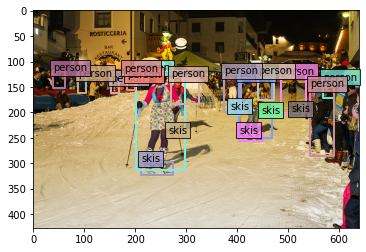

Index:  113791
number of boxes:  14
class name: 
broccoli broccoli broccoli pizza broccoli broccoli broccoli broccoli broccoli broccoli broccoli broccoli broccoli broccoli



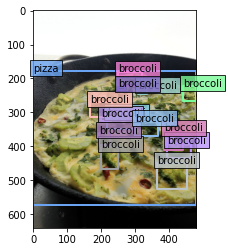

In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import warnings
warnings.filterwarnings("ignore") #忽略什么的警告？

plt.ion()

def draw_bbox(bbox, ax, polygons, color, name):
    c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
#     [bbox_x, bbox_y, bbox_w, bbox_h] = bbox
    [bbox_x, bbox_y, bbox_x2, bbox_y2] = bbox
    bbox_w = bbox_x2 - bbox_x
    bbox_h = bbox_y2 - bbox_y
    
    poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
    np_poly = np.array(poly).reshape((4,2))
    polygons.append(Polygon(np_poly))
    color.append(c)
    
    # show catogory name
    ax.text(bbox_x, bbox_y, name, size = 10, color='black', bbox=dict(boxstyle="square",facecolor=c,alpha=0.8,
                                                                      ))

#随机展示十组样本
plt.figure()
for n in range(2):
#     i = 7830
    i = random.randint(0, len(trainset)-1)

    print('Index: ', i)
    image, target = trainset[i]
#     print(image)
#     print(target)
    plt.imshow(image)
    
    ax = plt.gca()
    
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    print('number of boxes: ', len(target['boxes']))
    nms=[classnames[t.item()] for t in target['labels']]
    print('class name: \n{}\n'.format(' '.join(nms)))
    
    for j in range(len(target['boxes'])):
        bbox = target['boxes'][j]
        name = classnames[target['labels'][j].item()]
        draw_bbox(bbox, ax, polygons, color, name)
        
    p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
    ax.add_collection(p)
    
    plt.savefig('./samples/' + str(target['image_id'].item())+'.png', dpi=300)
    plt.pause(0.01)
    plt.show()
   
    ax.clear()
